### Описательная статистика

In [50]:
import pandas as pd
import statistics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/wine_cleared.csv') # чтение данных

Модуль **statistics**

Меры центральной тенденции:
* **mean()** - среднее арифметическое;
* **median()** - медиана;
* **median_low()** - при четном значении эл-в левое значение;
* **median_high()** - при четном значении эл-в правое значение;
* **moda()** - самое частое значение;

функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку

In [11]:
statistics.mode(df.price)

35.363389129985535

In [13]:
df.price.mode()

0    35.363389
Name: price, dtype: float64

#### Корреляция

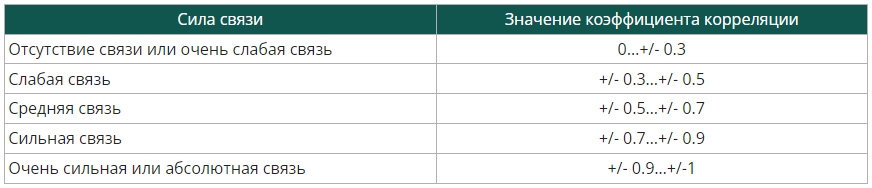

 **Мультиколлинеарность** — такая сильная зависимость переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения (от +/-0.7)

 * **df.corr()** - матрица корреляции
    + method - метод рассчета корреляции:
        + **pearson** — корреляция Пирсона;
        + **kendall** — корреляция Кендалла;
        + **spearman** — корреляция Спирмена;

**Корреляция Пирсона** \
Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками ($x_2 = a*x_1 + b$). При его использовании предполагаем, что признаки приблизительно нормально распределены и не имеют выбросов.

In [51]:
df.corr() # матрица корреляции

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.007124,0.004652
points,0.007124,1.000000,0.402137
price,0.004652,0.402137,1.000000


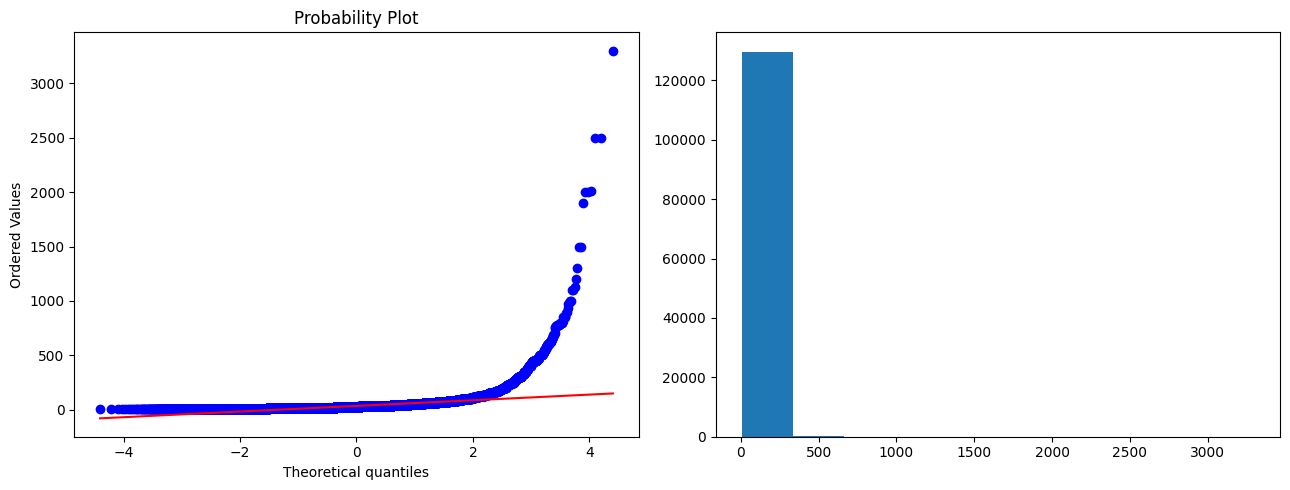

In [52]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

fig, axs = plt.subplots(2, 1, figsize=(13, 5))

plt.subplot(1,2,1); # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show(); 

Признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол

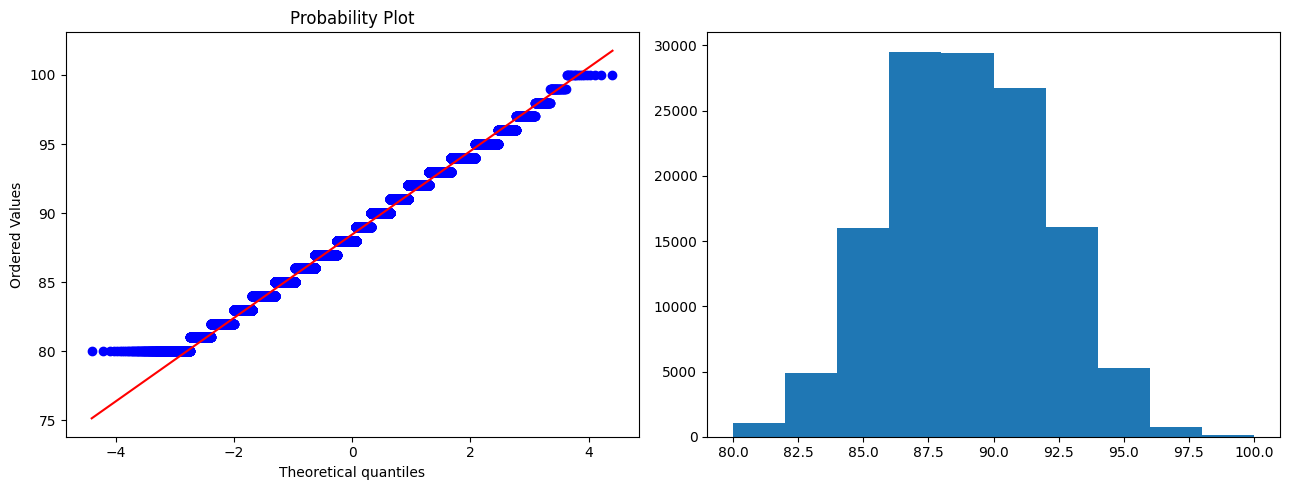

In [53]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

fig, axs = plt.subplots(2, 1, figsize=(13, 5))

plt.subplot(1,2,1); # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show(); 

Признак распределён нормально, так как q-q plot имеет прямую линию, а гистограмма распределения похожа на колокол

**Ранговая корреляция** — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

**Корреляция Спирмена** \
Коэффициент корреляции Спирмена используется для вычисления взаимосвязей между категориальными переменными.
Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь. 

In [55]:
df.corr(method='spearman')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.009378,0.003751
points,0.009378,1.000000,0.581095
price,0.003751,0.581095,1.000000


**Корреляция Кендалла** \
Предусмотрена для нахождения взаимосвязей между категориальными переменными.

Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

In [56]:
df.corr(method='kendall')

,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


**Корреляция Мэтьюса** \
Мера силы связи между бинарными переменными.

In [57]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

#### Визуализация корреляций

* BMI — индекс массы тела (ИМТ)
* year — год размещения модели в журнале
* waist — обхват талии модели
* hips — обхват бёдер модели
* height — рост модели
* weight — вес модели
* waist/hip — соотношение обхвата талии и бёдер

In [58]:
data = pd.read_csv('data/model.csv')

In [59]:
data.corr() # матрица корреляций

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.000000,0.292518,-0.281576,0.284482,-0.010753,0.025309,0.458945
Waist,0.292518,1.000000,0.283060,0.372637,0.452704,0.136549,0.742284
Hips,-0.281576,0.283060,1.000000,0.228054,0.541836,0.211395,-0.422412
Height,0.284482,0.372637,0.228054,1.000000,0.706569,-0.037934,0.198754
Weight,-0.010753,0.452704,0.541836,0.706569,1.000000,0.212701,0.067543
BMI,0.025309,0.136549,0.211395,-0.037934,0.212701,1.000000,-0.010173
Waist/Hip,0.458945,0.742284,-0.422412,0.198754,0.067543,-0.010173,1.000000


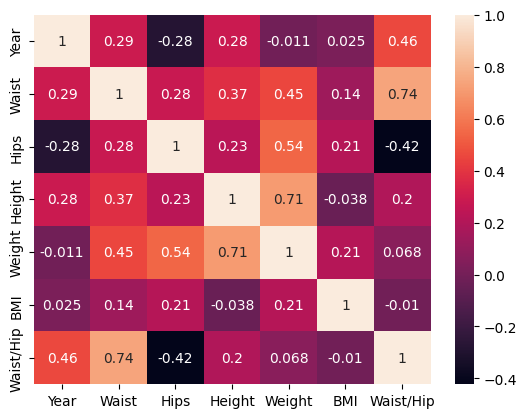

In [61]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True); # тепловая матрица корреляций

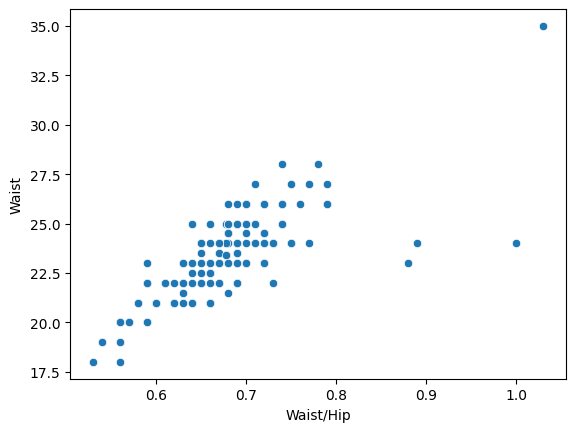

In [63]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist"); # точечная диаграмма рассеивания

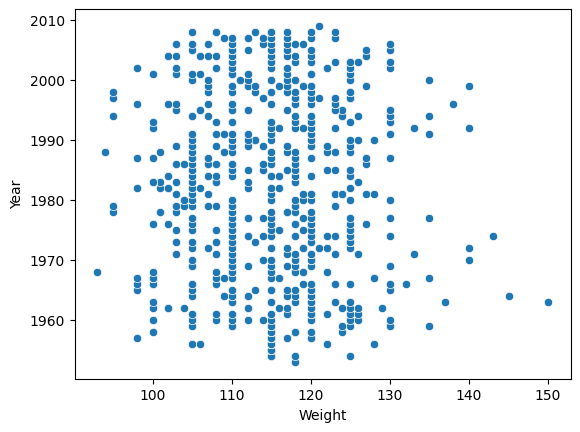

In [65]:
sns.scatterplot(data=data, x="Weight", y="Year");

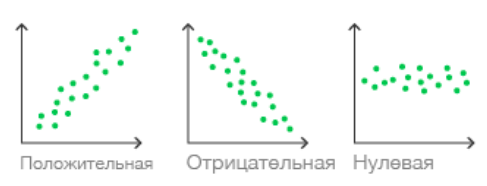

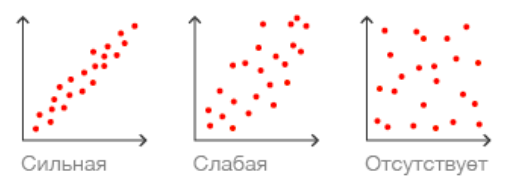

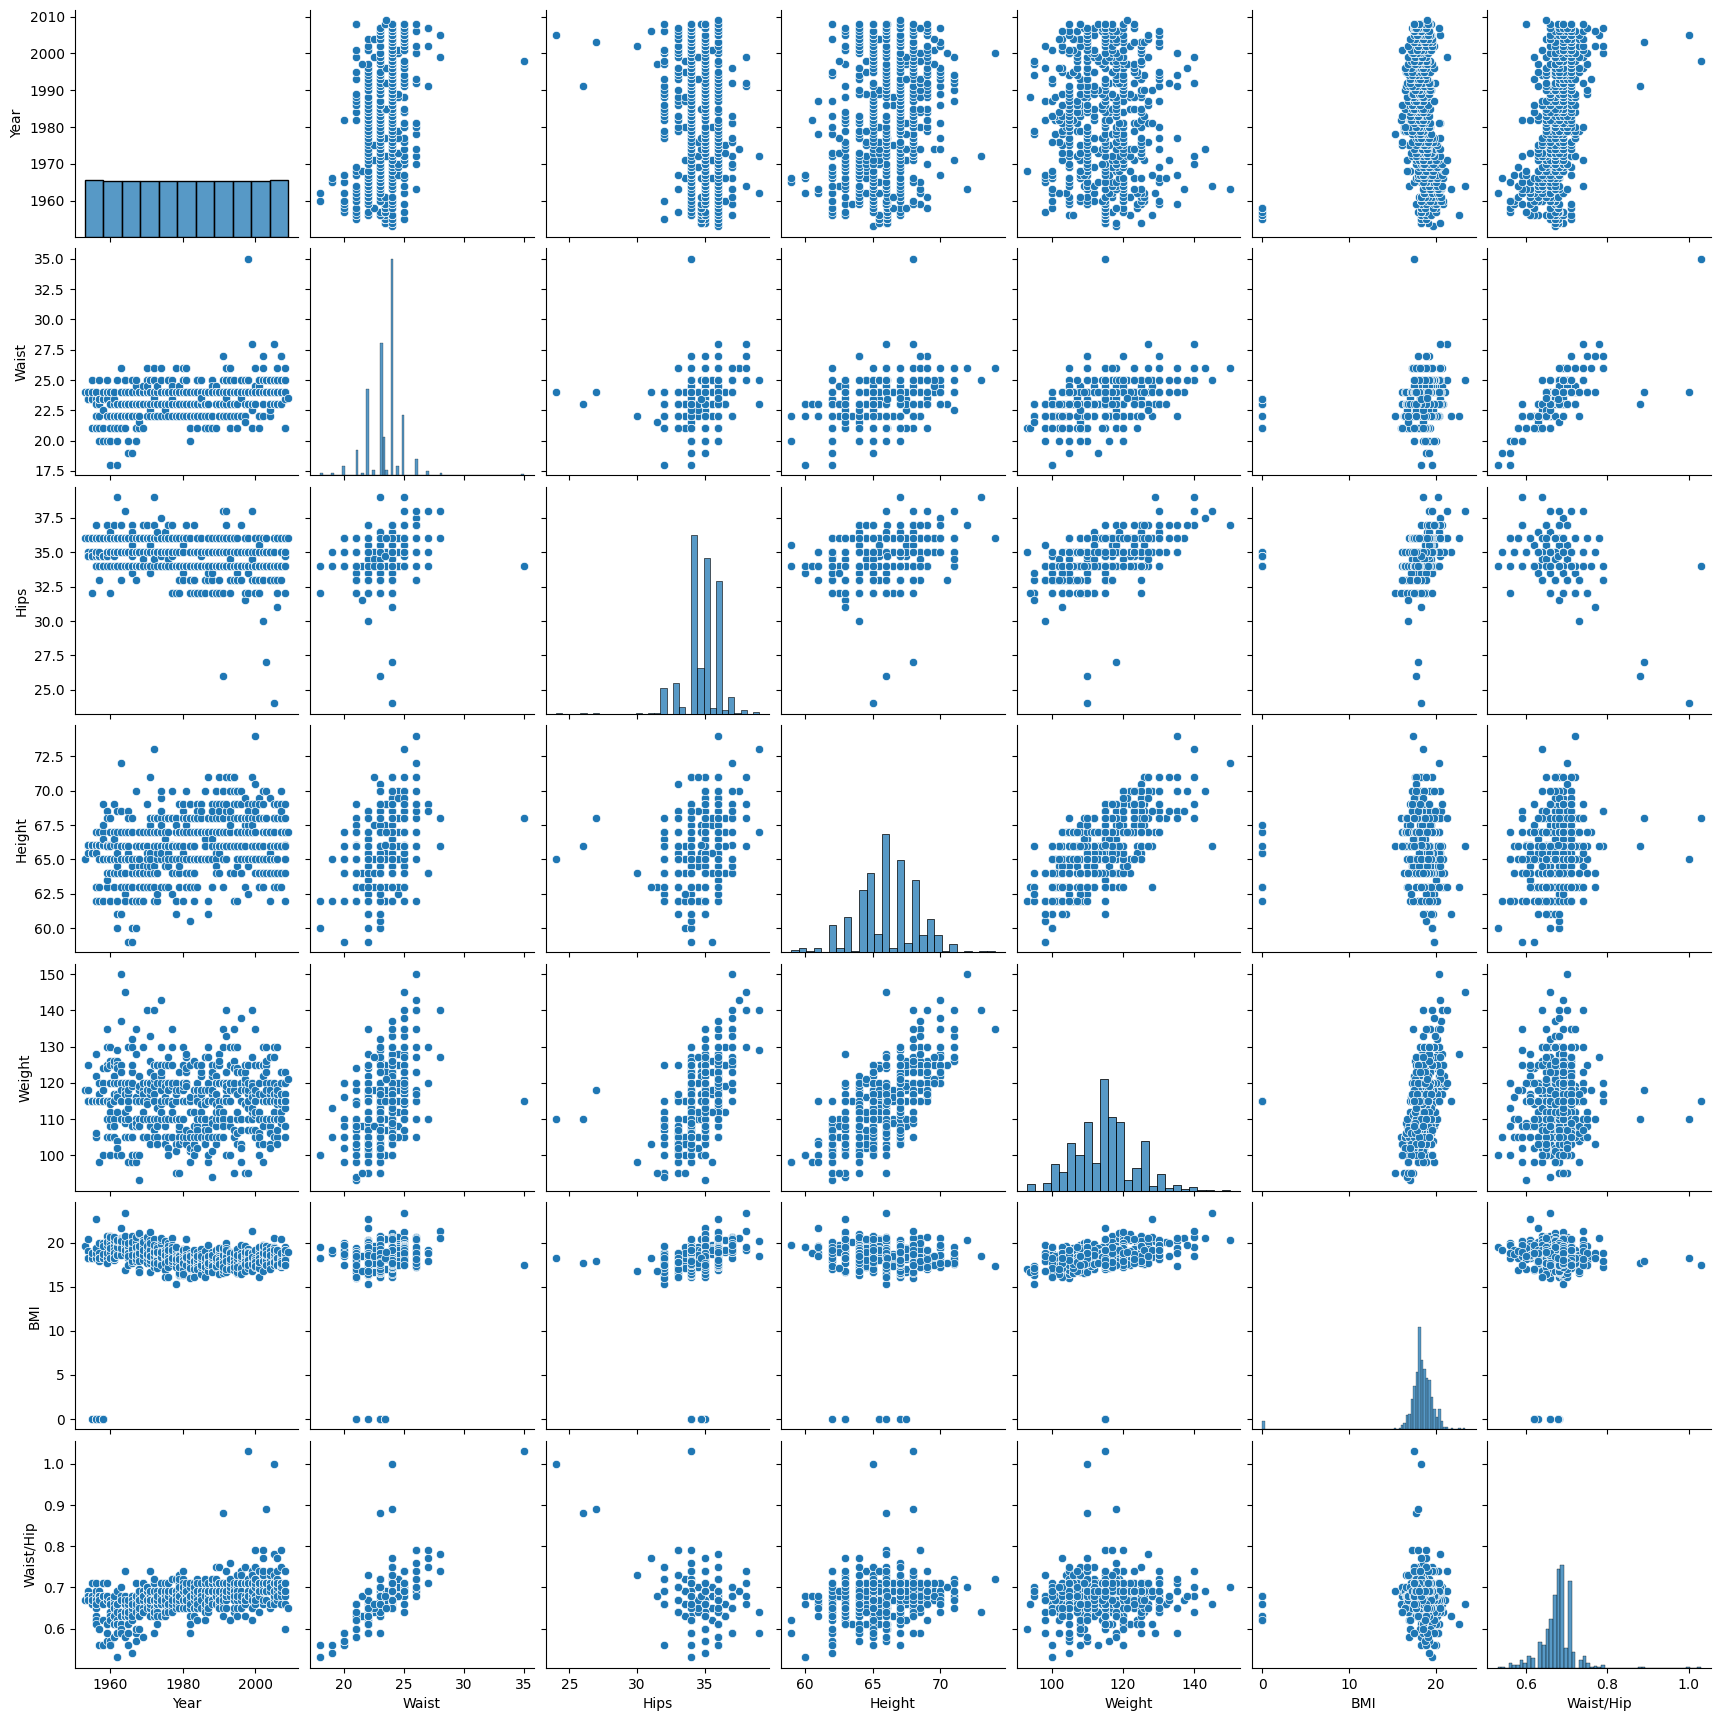

In [67]:
sns.pairplot(data); # график попарных корреляций

С увеличением обхвата бедер модели ИМТ незначительно увеличивается

Обхват бёдер имеет положительную связь с весом модели

С увеличением обхвата бёдер увеличивается вес модели.

Год выпуска журнала и вес модели имеют нулевую связь.

In [73]:
display(data.describe())

,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,1981.000000,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
std,15.937093,1.341740,1.323052,2.189135,8.540595,2.363859,0.041711
min,1953.000000,18.000000,24.000000,59.000000,93.000000,0.000000,0.530000
25%,1967.000000,23.000000,34.000000,65.000000,110.000000,17.792500,0.660000
50%,1981.000000,24.000000,35.000000,66.000000,115.000000,18.320000,0.680000
75%,1995.000000,24.000000,36.000000,67.500000,120.000000,19.040000,0.700000
max,2009.000000,35.000000,39.000000,74.000000,150.000000,23.400000,1.030000
